# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

Wanneer water warmte opneemt, geldt:
$$Q = mc\Delta T$$
De warmtebron levert een vast vermogen van **P = 10\,\text{W}**:
$$Q = Pt$$
Gelijkstellen geeft:
$$c = \frac{Pt}{m\Delta T}$$
Voor Volt en Ampere instellen:
$$P = UI$$

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
### Procedure (van ons zelf)

1. **Voorbereiden van de opstelling**  
   - Vul de calorimeter of beker met 200 ml water.    
   - Plaats het verwarmingselement volledig onder het wateroppervlak.  
   - Zorg dat de thermometer vrij in het water hangt en niet tegen de wand komt.

2. **Begintemperatuur meten**  
   - Wacht totdat het water in temperatuur stabiel is.  
   - Noteer de begintemperatuur van het water.


3. **Verwarming starten**  
   - Schakel het verwarmingselement in op een Voltage en een Ampere
   - Start tegelijk de stopwatch.  
   - Verwarm gedurende een vooraf bepaalde tijd van om de 10 seconden tot een max van ongeveer 5 minuten \(t\).

4. **Eindtemperatuur meten**  
   - Schakel het verwarmingselement uit zodra de tijd verstreken is.  
   - Noteer onmiddellijk de eindtemperatuur van het water.

5. **Afronden**  
   - Noteer alle gemeten waarden: massa \(m\), begintemperatuur, eindtemperatuur en de tijd \(t\).  
   - Voer deze waarden hierna in bij de code voor verdere verwerking.

### Procedure (van de ander)
1. bouw de opstelleing
2. stop 150ml water in de maatbeeker
3. voeg te thermometer toe en meet de begin temperatuur
4. zet de mixer aan op ~8  
5. zet het wamte element aan op 30 Watt
6. zet timer aan en meet met de thermometer elke 10 sec de temperatuur
7. doe dit voor minimaal 5 minuten
8. hiernaa kan de opstelling weer worden afgebroken

```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.
2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.
```


## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.

# Resultaten



=== 200 g water ===
a (stijgsnelheid) = 0.02702 ± 0.00037 °C/s
b (T0) = 19.86 °C
c (berekend) = 4925.1 J/kgK


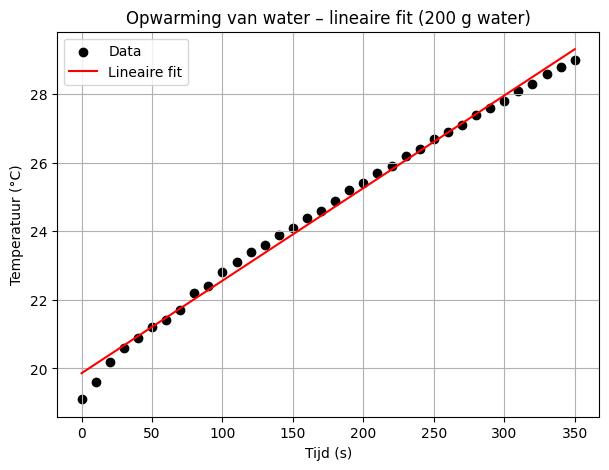


=== 150 g water ===
a (stijgsnelheid) = 0.03062 ± 0.00032 °C/s
b (T0) = 21.14 °C
c (berekend) = 5401.1 J/kgK


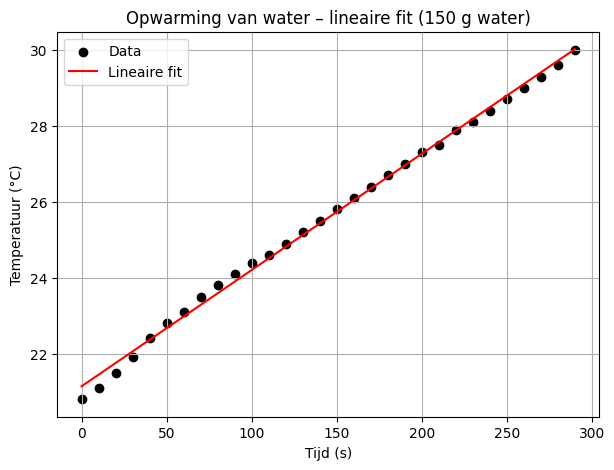

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Model: lineaire opwarming ---
def lin_model(t, a, b):
    return a*t + b

# --- DATA ---
t_200 = np.arange(0, 351, 10)
T_200 = np.array([19.1,19.6,20.2,20.6,20.9,21.2,21.4,21.7,22.2,22.4,22.8,23.1,
                  23.4,23.6,23.9,24.1,24.4,24.6,24.9,25.2,25.4,25.7,25.9,26.2,
                  26.4,26.7,26.9,27.1,27.4,27.6,27.8,28.1,28.3,28.6,28.8,29.0])

t_150 = np.arange(0, 300, 10)
T_150 = np.array([20.8,21.1,21.5,21.9,22.4,22.8,23.1,23.5,23.8,24.1,24.4,24.6,
                  24.9,25.2,25.5,25.8,26.1,26.4,26.7,27.0,27.3,27.5,27.9,28.1,
                  28.4,28.7,29.0,29.3,29.6,30.0])

# Vermogens en massa's
P_200, m_200 = 16.1*1.66, 0.2008
P_150, m_150 = 15.6*1.59, 0.150

#Data analyse
def analyse(t, T, P, m, label):
    popt, pcov = curve_fit(lin_model, t, T)
    a, b = popt
    u_a = np.sqrt(pcov[0,0])      # onzekerheid in a

    c = P / (m * a) # soortelijke warmte 

    # foutvoortplanting calculus approach:
    u_c = (P / (m * a**2)) * u_a

    print(f"\n=== {label} ===")
    print(f"a (stijgsnelheid) = {a:.5f} ± {u_a:.5f} °C/s")
    print(f"b (T0) = {b:.2f} °C")
    print(f"c (berekend) = {c:.1f} ± {u_c:.1f} J/kgK")

    # plotten
    t_dense = np.linspace(0, t[-1], 400)

    plt.figure(figsize=(7,5))
    plt.scatter(t, T, color='black', label="Data")
    plt.plot(t_dense, lin_model(t_dense, a, b), color='red', label="Lineaire fit")
    plt.xlabel("Tijd (s)")
    plt.ylabel("Temperatuur (°C)")
    plt.title(f"Opwarming van water – lineaire fit ({label})")
    plt.grid(True)
    plt.legend()
    plt.show()

# Analyse draaien
analyse(t_200, T_200, P_200, m_200, "200 g water")
analyse(t_150, T_150, P_150, m_150, "150 g water")


In [1]:
#plt.savefig("Figuren/cwater.ipynb", dpi=450)
# waarbij naam vervangen wordt door de bestandsnaam. 

# Discussie en conclusie

### Discussie & Conclusie

Beide datasets laten een vrijwel perfect lineair verband zien tussen tijd en temperatuur. Dit sluit aan bij de verwachting dat de opwarming door een constant elektrisch vermogen in eerste benadering lineair verloopt wanneer de temperatuurstijging beperkt blijft. De residuen laten geen systematische kromming zien, wat betekent dat warmteverlies naar de omgeving tijdens de meetperiode geen dominante rol heeft gespeeld.

Voor het experiment met 200 g water is een opwarmsnelheid gevonden van  
**a = 0.02702 ± 0.00037 °C/s**, wat resulteert in  
**c = 4925.1 ± 67.5 J/kgK**.

Voor 150 g water is een hogere opwarmsnelheid bepaald:  
**a = 0.03062 ± 0.00032 °C/s**, met  
**c = 5401.1 ± 56.4 J/kgK**.

Het verschil in stijgsnelheid is logisch: een kleinere massa warmt sneller op bij vergelijkbaar vermogen. De twee waarden voor c liggen in dezelfde orde van grootte maar verschillen meer dan binnen hun onzekerheden. Dit wijst erop dat de totale experimentele onzekerheid groter is dan de statistische fout van de lineaire fit. In deze analyse is namelijk alleen de onzekerheid in de fitparameter a meegenomen. Onzekerheden in spanning, stroom, weerstand, massa, thermometerresolutie en reactietijd van het meetinstrument zijn niet bekend en dus niet meegenomen. Een kleine fout in het vermogen P werkt direct door in c, waardoor de uiteindelijke onzekerheid waarschijnlijk aanzienlijk groter is dan hier berekend.

De fitparameter b (het extrapoleerde T₀) verschilt tussen de twee metingen (19.86 °C en 21.14 °C). Dit hoeft niet exact overeen te komen met de gemeten begintemperatuur op t = 0, maar het toont wel dat de twee experimenten zijn gestart vanuit verschillende begintoestanden of dat de eerste paar meetpunten niet perfect op de fitlijn liggen. Deze parameter is nodig omdat de lineaire fit niet gedwongen mag worden door het eerste punt; daarmee vangt b kleine afwijkingen op in het eerste meetmoment, het nulpunt van de tijdmeting en eventuele responsvertraging van de thermometer.

Beide experimenten bevestigen het verwachte lineaire fysische gedrag, maar de afgeleide waardes voor c liggen boven de literatuurwaarde. Dit is te verklaren doordat warmteverlies naar de omgeving de effectieve opwarmingssnelheid verlaagt, waardoor c te hoog wordt berekend. Omdat dit effect niet gemeten of gecompenseerd is, vormt het een systematische fout die groter is dan de statistische onzekerheden.